In [37]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = (15.0, 8.0)
plt.rcParams['savefig.dpi'] = 100

out_dir = '/Users/kevin/Desktop/'

In [38]:
# create 1000 data points from a gaussian distribution
data = np.random.randn(1000, 500)

# 10 hidden layers
hidden_layer_sizes = [500]*10

# define nonlinearities
nonlinearities = ['selu']*len(hidden_layer_sizes)

In [39]:
def selu(x):
    alpha = 1.6732632423543772848170429916717
    scale = 1.0507009873554804934193349852946
    return scale*np.where(x>=0.0, x, alpha*np.exp(x)-alpha)

def relu(x):
    return np.maximum(0, x)

def elu(x):
    return np.where(x>=0.0, x, np.exp(x)-1)

act = {'relu': lambda x: relu(x), 
       'elu': lambda x: elu(x), 
       'selu': lambda x: selu(x)}

In [40]:
num_layers = len(hidden_layer_sizes)

stats = {}
for i in range(num_layers):
    # input layer
    X = data if i == 0 else stats[i-1]
    
    # initialize weights
    fan_in, fan_out = X.shape[1], hidden_layer_sizes[i]
    if nonlinearities[i] == 'selu':
        W = np.random.normal(size=(fan_in, fan_out), scale=np.sqrt(1/fan_in))
    else: # he et. al initialization
        W = np.random.randn(fan_in, fan_out) / np.sqrt(fan_in / 2)
    
    # matrix multiply with nonlinearity
    H = np.dot(X, W)
    H = act[nonlinearities[i]](H)
    
    # store result of layer
    stats[i] = H

In [41]:
# mean and std for each layer
layer_means = [np.mean(s) for i,s in stats.items()]
layer_stds = [np.std(s) for i,s in stats.items()]

print('Input layer has mean {} and std {}'.format(np.mean(data), np.std(data)))
for i,s in stats.items():
    print('Hidden layer {} has mean {} and std {}'.format(i+1, layer_means[i], layer_stds[i]))

Input layer has mean 6.019174205051911e-06 and std 1.0002448528336734
Hidden layer 1 has mean 0.0016988395065592535 and std 1.0020043194464898
Hidden layer 2 has mean 0.0016251890957181484 and std 1.0017221839365462
Hidden layer 3 has mean 0.003808772886082237 and std 1.0020264596799746
Hidden layer 4 has mean 0.00015194580069344922 and std 1.0003650558463895
Hidden layer 5 has mean 0.002357690458390198 and std 1.0011736872977863
Hidden layer 6 has mean -0.0006693161462002937 and std 1.0029542625680594
Hidden layer 7 has mean 0.002008152286885411 and std 1.0008192918283196
Hidden layer 8 has mean -0.0021299818100189508 and std 0.9991548899790696
Hidden layer 9 has mean 0.004084958146413099 and std 0.9975602725603314
Hidden layer 10 has mean -0.0014887566407694628 and std 0.9946573185206548


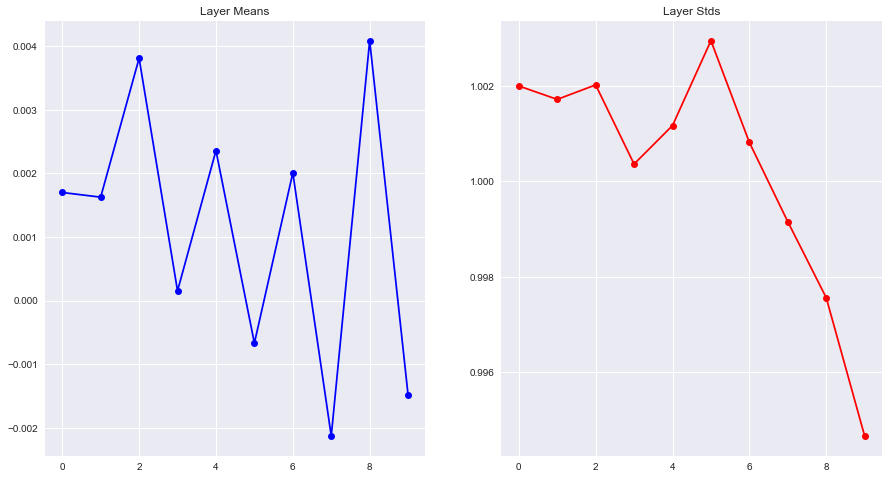

In [42]:
# plot means and stds
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True)
ax1.plot(list(stats.keys()), layer_means, 'ob-')
ax1.set_title('Layer Means')
ax2.plot(list(stats.keys()), layer_stds, 'or-')
ax2.set_title('Layer Stds')
plt.show()

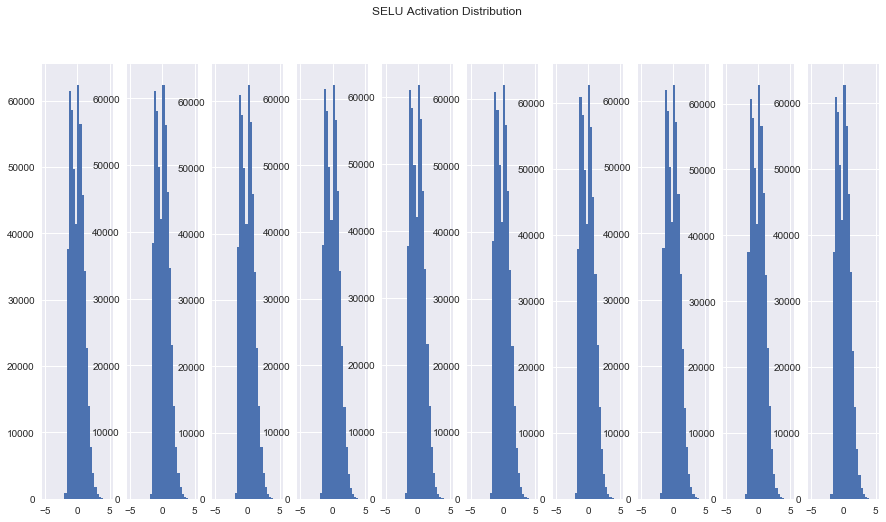

In [43]:
# plot the raw distribution
plt.figure()
for i,s in stats.items():
    plt.subplot(1, num_layers, i+1)
    plt.hist(s.ravel(), 30, range=(-5, 5))
plt.suptitle('SELU Activation Distribution')
plt.savefig(out_dir + 'selu.eps', format='eps', dpi=200)